## Imports

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Data loading

In [2]:
df = pd.read_csv('no-show-hospital-data.csv')

## Data clean-up

Change data type of the PatientId variable to an integer.

In [3]:
df['PatientId'] = df.PatientId.astype(int)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert the target variable to binary.

In [23]:
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

/home/sergey/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [27]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between,PrevNoShow
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,False
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,False
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,False
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,OTHER,0,0,0,0,0,0,0,0,False
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,False


## Drop irrelevant variables

Unique appointment ID is useless for our analysis.

In [4]:
df.drop('AppointmentID', axis=1, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Convert date columns to the date data type

In [5]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)

In [6]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Create days_between variable

Compute number of days between an appointment has been scheduled and it has actually taken place.

In [7]:
def days_between(x):
    start = x['ScheduledDay']
    end = x['AppointmentDay']
    delta = (end - start).days
    if delta < 0:
        return 0
    else:
        return delta

In [8]:
df['days_between'] = df.apply(days_between, axis=1)

In [9]:
df.sample(n=5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between
10185,45879543886953,F,2016-04-07 08:24:11,2016-05-10,25,CRUZAMENTO,0,0,0,0,0,1,Yes,32
31704,59448886886117,F,2016-04-26 10:58:56,2016-05-09,33,RESISTÊNCIA,0,0,0,0,0,0,No,12
41178,39982277592775,F,2016-05-09 09:27:42,2016-05-31,44,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No,21
41020,817275598878,F,2016-05-05 12:45:54,2016-05-05,14,MARIA ORTIZ,0,0,0,0,0,0,No,0
26817,7747522417177,M,2016-05-10 07:56:42,2016-05-16,41,FORTE SÃO JOÃO,0,0,0,0,0,0,No,5


## Group neighbourhoods with few observations as Other

Group together neighbourhoods with fewer than 100 observations.

In [10]:
sizes = df.groupby('Neighbourhood').size().sort_values()
small_size = sizes[sizes < 100]
small_size

Neighbourhood
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
PONTAL DE CAMBURI              69
MORADA DE CAMBURI              96
dtype: int64

In [11]:
df.replace(to_replace=small_size.keys(), inplace=True, value='OTHER')

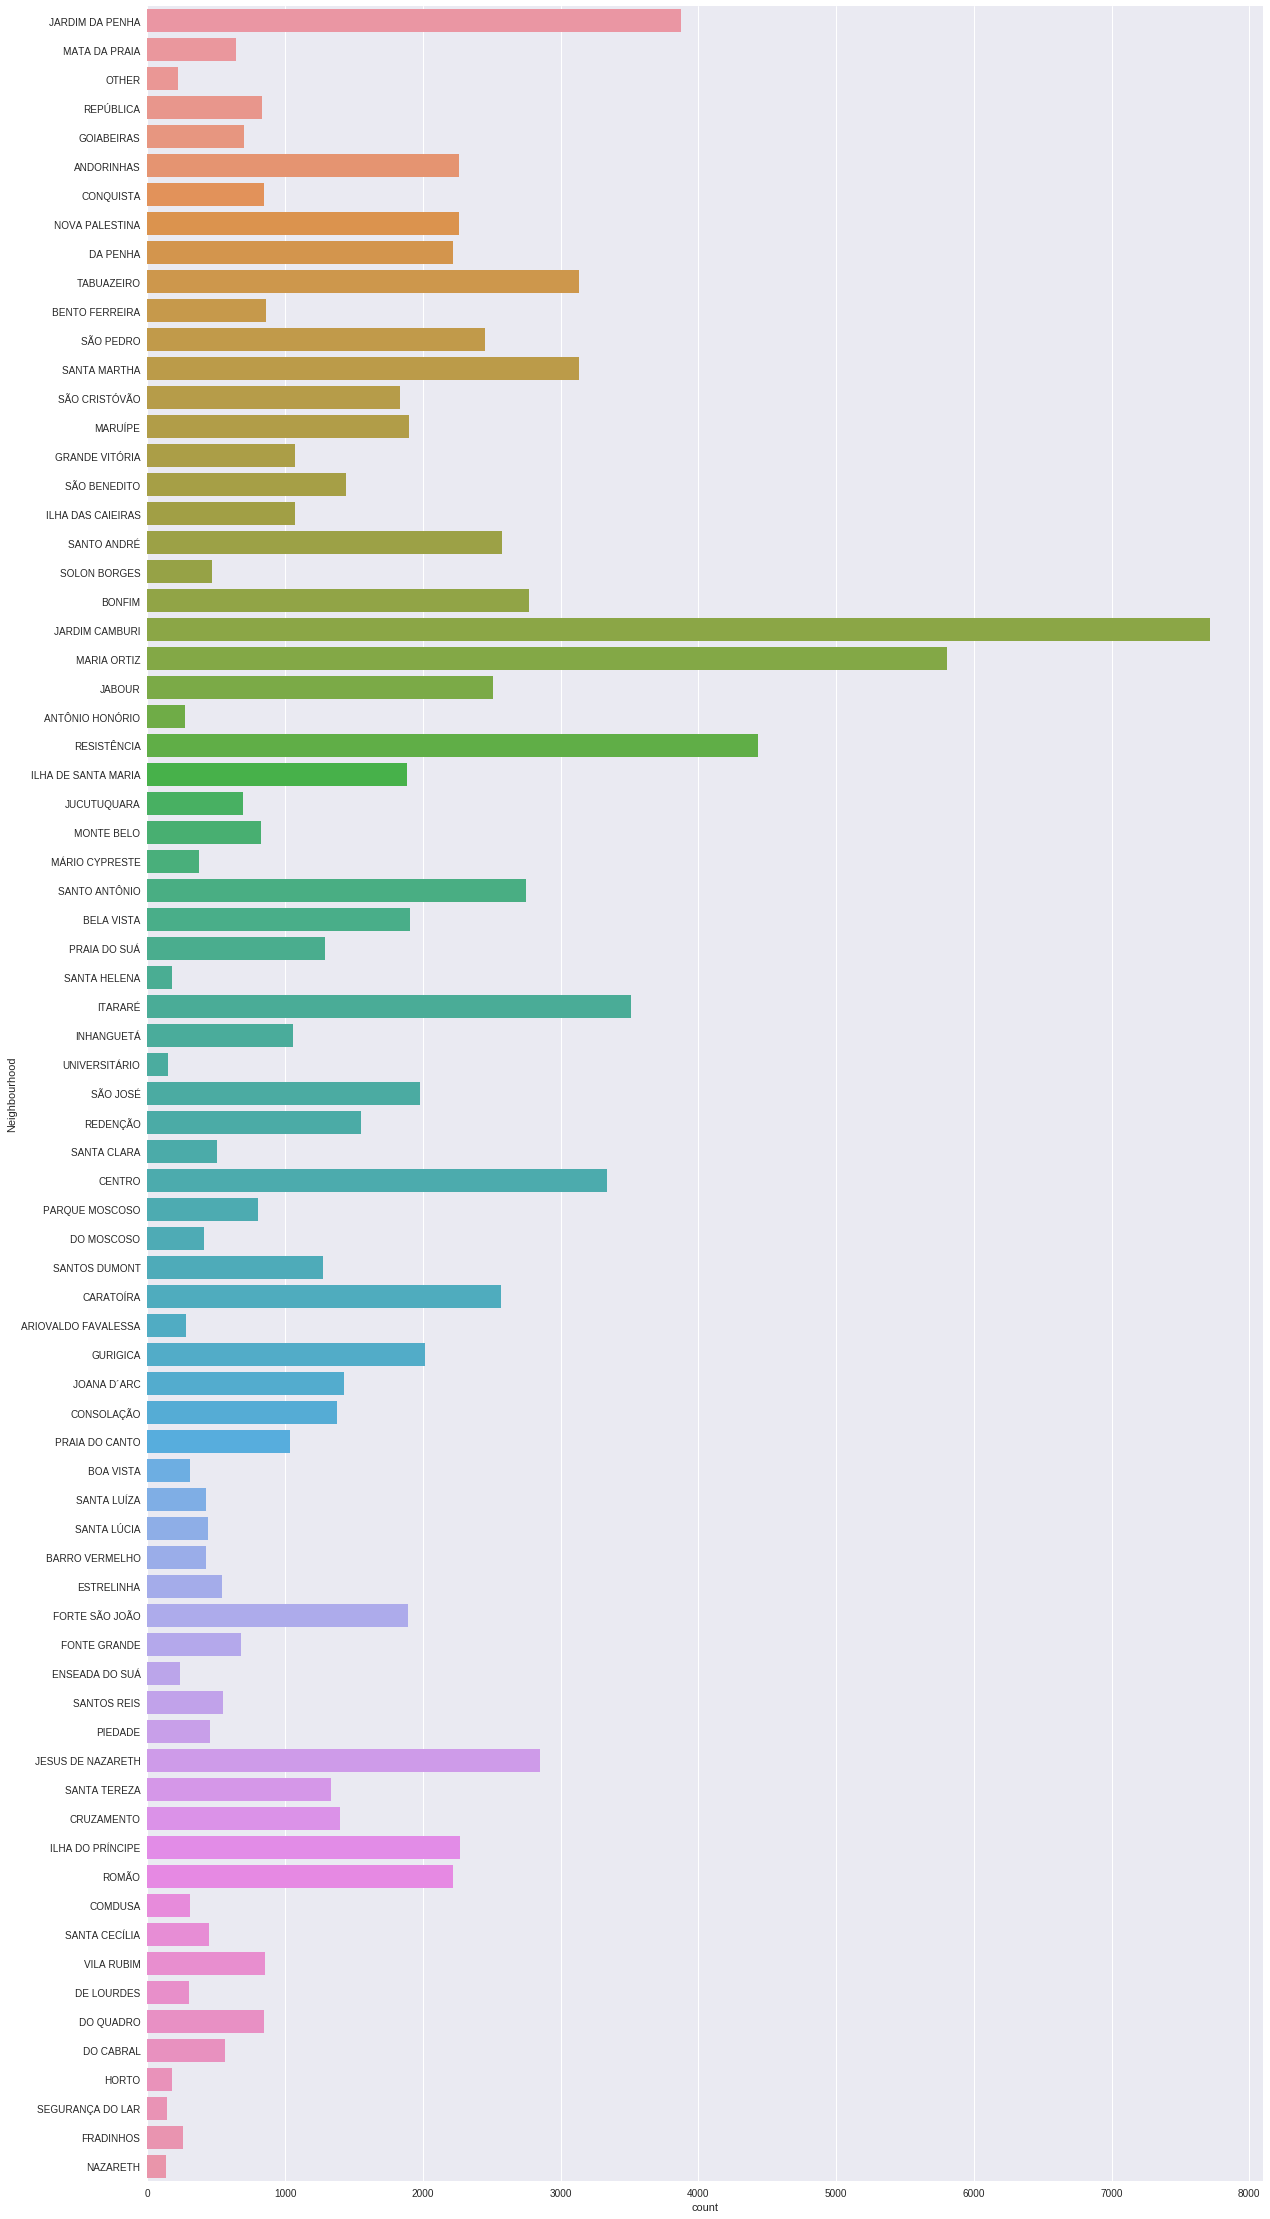

In [12]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y='Neighbourhood', data=df)
plt.show()

## No-show based features

First, compute re-schedules: that's an appointment for the same patient that is scheduled after a no-show appointment.

In the same loop compute number of appointments leading up to the current appointment.

In [ ]:
# new variable indicates if previous appointment was a no-show
df['IsReschedule'] = 0
# number of appointments before this one
df['PrevAppointments'] = 0
# number of no-show appointments before this one
df['PrevNoShows'] = 0

# group appointments by patients
grouped = df.groupby('PatientId')
for name, group in grouped:
    prev_no_show = False
    prev_appointments = 0
    prev_no_show_count = 0

    # and go through appointments in order
    sorted_by_appointment = group.sort_values(by='AppointmentDay')
    for index, appointment in sorted_by_appointment.iterrows():
        # compute number of appointments leading to this appointment
        df.at[index, 'PrevAppointments'] = prev_appointments
        # compute if previous appointment was a no-show
        if prev_no_show:
            df.at[index, 'IsReschedule'] = 1
        # compute # of previous no-shows
        if prev_no_show_count:
            df.at[index, 'PrevNoShows'] = prev_no_show_count
            
        if appointment['No-show']:
            prev_no_show = True
            prev_no_show_count += 1
        else:
            prev_no_show = False
            
        prev_appointments += 1

In [40]:
df.sample(n=40)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between,PrevNoShow,PrevAppointments
96250,8.823454e+11,M,2016-06-02 07:24:31,2016-06-07,13.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0,0
12275,1.132838e+12,M,2016-05-18 07:18:19,2016-05-18,41.0,ILHA DO PRÍNCIPE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
2092,1.541918e+11,F,2016-04-29 08:14:37,2016-04-29,73.0,ANDORINHAS,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
28161,1.955166e+11,M,2016-05-11 15:01:51,2016-05-17,62.0,SANTA MARTHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0,0
34523,4.556743e+14,M,2016-05-19 07:22:16,2016-05-19,63.0,TABUAZEIRO,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
106375,7.953174e+14,F,2016-05-17 08:32:05,2016-06-01,22.0,ILHA DO PRÍNCIPE,1.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,0,3
21615,9.217535e+12,F,2016-05-02 19:08:36,2016-05-13,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0,7
10440,3.482554e+14,F,2016-04-29 11:17:28,2016-05-02,48.0,BONFIM,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0
42192,6.216927e+13,F,2016-05-05 10:47:14,2016-05-25,47.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0,2
84606,4.988423e+11,F,2016-06-01 10:42:55,2016-06-06,63.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0,0
